----------------

## Описание данных.

В данном проекте нам предстоит провести работу над тремя наборами данных, содержащие информацию о стаде фермера на текущий момент, имя папы каждой коровы в стаде фермера и данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.<br>Целью нашей работы будет разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке новых коров.<br>- для начала мы загрузим данные, рассмотрим их;<br>- далее проведем предобработку данных, чтобы привести их к читаемому и удобному виду.<br>- затем нам необходимо будет провести исследовательский анализ, чтобы разобраться в данных получше, визуализировать их.<br>- для будующих моделей нам необходимо знать зависимости и типы связи между признаками, и в этом нам поможет корреляционный анализ.<br>- потом мы создадим модели линейной регресси и классификации, приведем их к лучшему виду. <br>- последнее, что нам останется - написать итоговый вывод по данной работе.

## Загрузка данных.

#### Загрузите данные в датафреймы, и изучите их.

In [1]:
!pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    r2_score,
    mean_squared_error, 
    mean_absolute_error,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)
import numpy as np
import scipy.stats as stats
from phik import phik_matrix

In [3]:
#загрузка и изучение данных
df_main = pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
df_main.info()
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
df_dad = pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
df_dad.info()
df_dad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
df_buy = pd.read_csv('/datasets/cow_buy.csv', delimiter=';')
df_buy.info()
df_buy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [6]:
#работа с названиями столбцов
df_main.columns = df_main.columns.str.lower()
df_main.columns = ['id', 'удой', 'эке',
       'сырой_протеин', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность', 'белок',
       'вкус_молока', 'возраст']
df_main.columns

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [7]:
df_dad.columns = df_dad.columns.str.lower()
df_dad.columns = ['id', 'имя_папы']
df_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [8]:
df_buy.columns = df_buy.columns.str.lower()
df_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_белок', 'возраст']
df_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_белок', 'возраст'],
      dtype='object')

**Промежуточный вывод:**<br>По первому взгляду стоит сказать, что названия столбцов некорректны, их нужно будет привести к нижнему регистру и поработать с их названиями. Также стоит отметить, что необходимо будет провести работу с типами данных столбцов. Пропущенных значений не обнаружено, а с дубликатами разберемся в следующем шаге.<br>Далее мы привели названия столбцов к более читаемому виду, а также привели их к нижнему регистру.

##  Предобработка данных.

#### Проверьте данные на наличие пропусков и дубликатов.

In [9]:
#работа с типами данных
df_main['эке'] = df_main['эке'].astype(str).str.replace(',', '.').astype(float)
df_main['спо'] = df_main['спо'].astype(str).str.replace(',', '.').astype(float)
df_main['жирность'] = df_main['жирность'].astype(str).str.replace(',', '.').astype(float)
df_main['белок'] = df_main['белок'].astype(str).str.replace(',', '.').astype(float)

df_buy['текущий_белок'] = df_buy['текущий_белок'].astype(str).str.replace(',', '.').astype(float)
df_buy['текущая_жирность'] = df_buy['текущая_жирность'].astype(str).str.replace(',', '.').astype(float)

In [10]:
#проверка на пропуски
df_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [11]:
df_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [12]:
df_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
текущая_жирность    0
текущий_белок       0
возраст             0
dtype: int64

In [13]:
#проверка на полные дубликаты
df_main[df_main.duplicated()]

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [14]:
df_main = df_main.drop_duplicates()

In [15]:
df_buy[df_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_белок,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [17]:
#проверка на неполные дубликаты
df_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [18]:
df_main['тип_пастбища'] = df_main['тип_пастбища'].replace('Равнинные', 'равнинное')
df_main['тип_пастбища'] = df_main['тип_пастбища'].replace('Равнинное', 'равнинное')
df_main['тип_пастбища'] = df_main['тип_пастбища'].replace('Холмистое', 'холмистое')
df_main['тип_пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [19]:
df_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [20]:
df_main['порода_папы_быка'] = df_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
df_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [21]:
#проверка на аномалии
df_main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [22]:
df_main.loc[df_main['удой'] > 45000]

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [23]:
df_dad = df_dad.loc[df_dad['id'] != 17].reset_index(drop = True)

In [24]:
df_main = df_main.query('удой < 45000')
df_main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Промежуточный вывод:**<br> На данном этапе мы провели работу с типами данных столбцов, а именно привели их к числовому типу там, где это было необходимо. Далее мы обработали полные и неполные дубликаты, их было не очень много, но избавиться от них пришлось. Пропущенных значений нигде не было обнаружено. И последнее, что мы сделали - это обработали аномалии, а именно избавились от слишком большого значения в столбце 'удой'.

## Исследовательский анализ данных.

#### Проведите статистический анализ всех признаков. Постройте графики для каждого признака.

In [25]:
#функция для построения ящика с усами
def boxplot_(df, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    sns.boxplot(data=df, x=column, ax=axes[0])
    axes[0].set_title(f'Boxplot for "{column}"')
    axes[0].set_ylabel('Count')

    sns.histplot(data=df, x=column, kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram for "{column}"')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

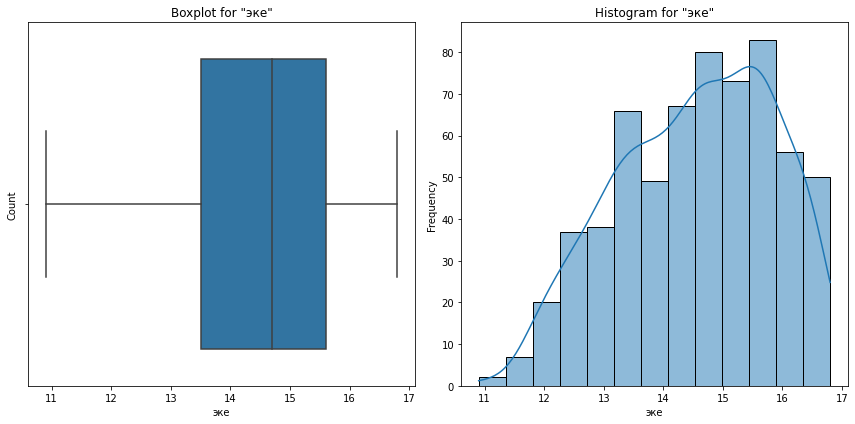

In [26]:
boxplot_(df_main, 'эке')

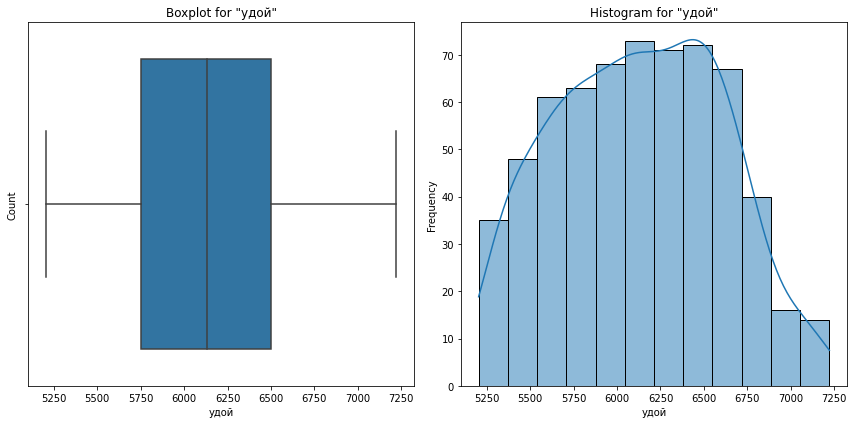

In [27]:
boxplot_(df_main, 'удой')

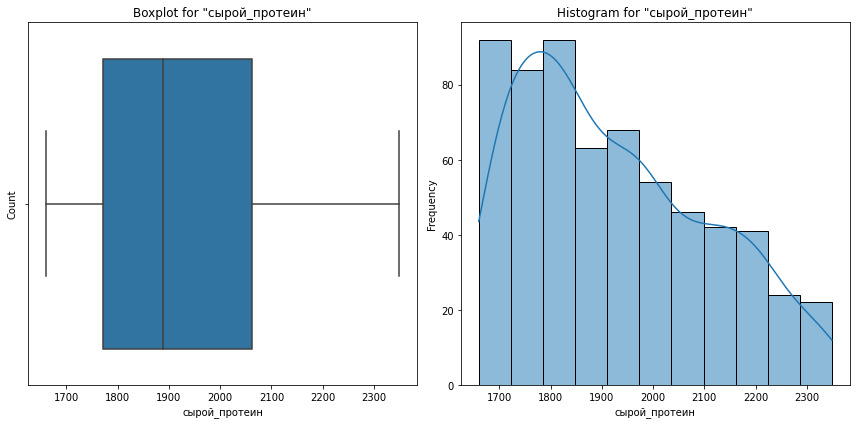

In [28]:
boxplot_(df_main, 'сырой_протеин')

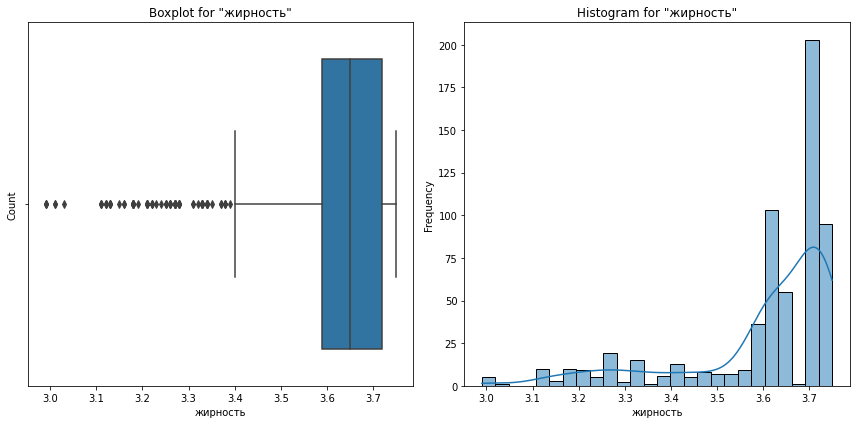

In [29]:
boxplot_(df_main, 'жирность')

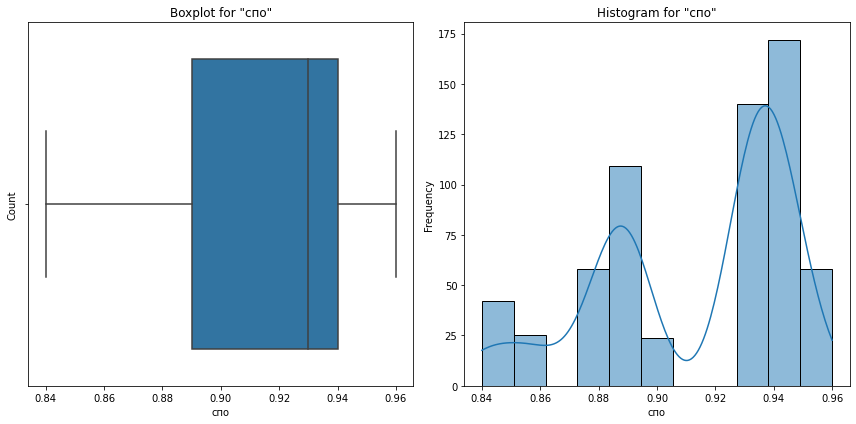

In [30]:
boxplot_(df_main, 'спо')

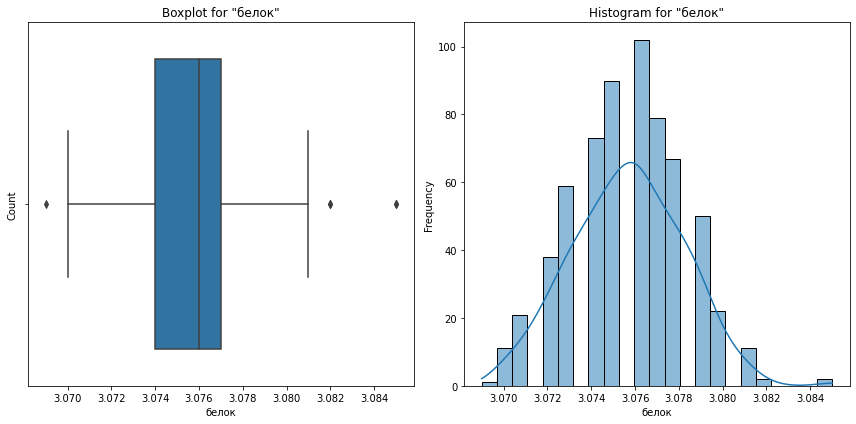

In [31]:
boxplot_(df_main, 'белок')

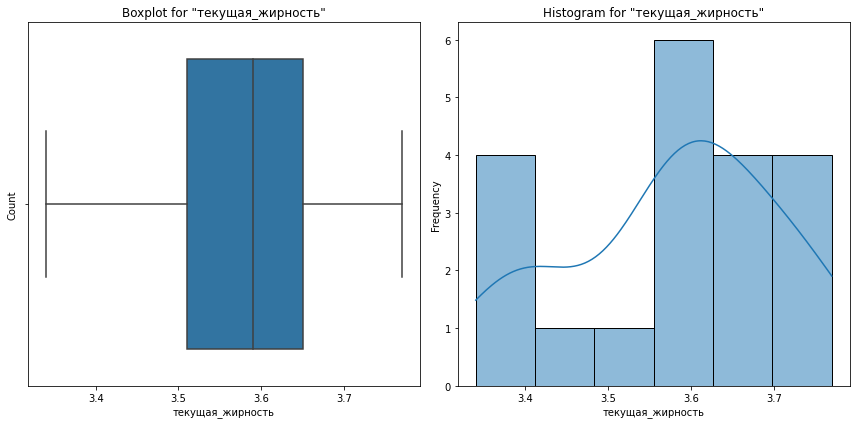

In [32]:
#df_buy (числовые признаки)
boxplot_(df_buy, 'текущая_жирность')

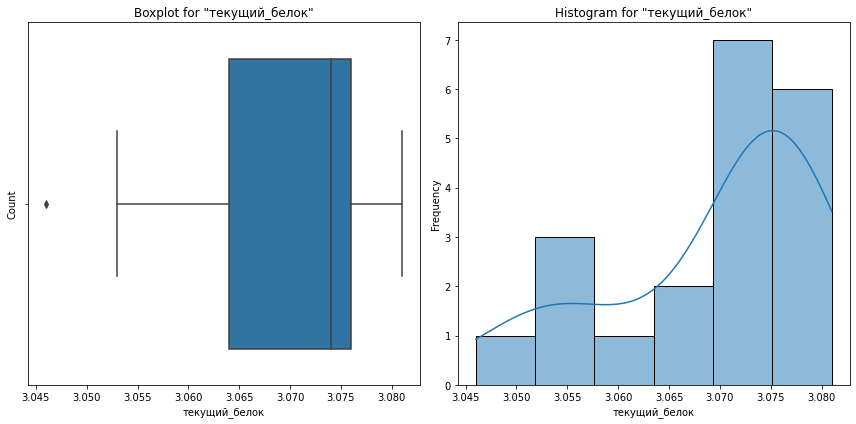

In [33]:
boxplot_(df_buy, 'текущий_белок')

In [34]:
#исследование категориальных признаков
#функция для построения столбчатых диаграм
def barplot_(df, column):
    sns.barplot(data=df, x=column, y=df.index)
    plt.title(f'Количество в столбце "{column}"')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

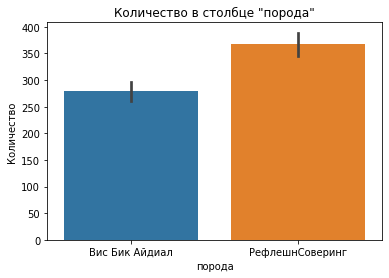

In [35]:
#df_main (категориальные признаки)
barplot_(df_main, 'порода')

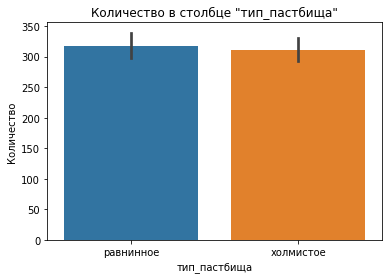

In [36]:
barplot_(df_main, 'тип_пастбища')

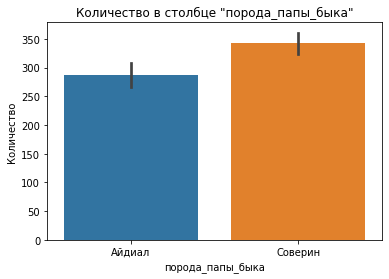

In [37]:
barplot_(df_main, 'порода_папы_быка')

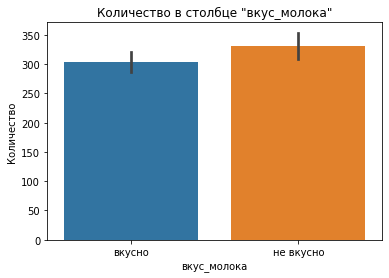

In [38]:
barplot_(df_main, 'вкус_молока')

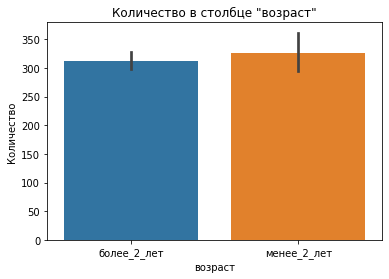

In [39]:
barplot_(df_main, 'возраст')

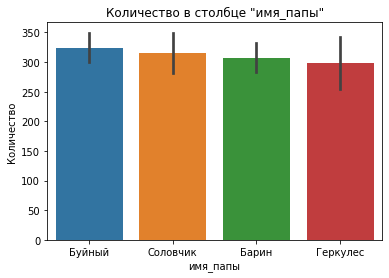

In [40]:
#df_dad (категориальные признаки)
barplot_(df_dad, 'имя_папы')

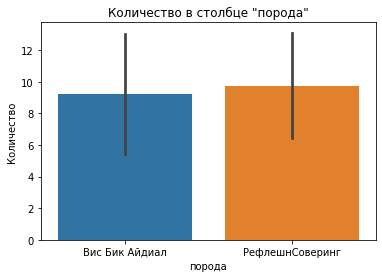

In [41]:
#df_buy (категориальные признаки)
barplot_(df_buy, 'порода')

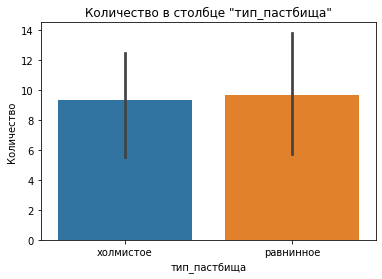

In [42]:
barplot_(df_buy, 'тип_пастбища')

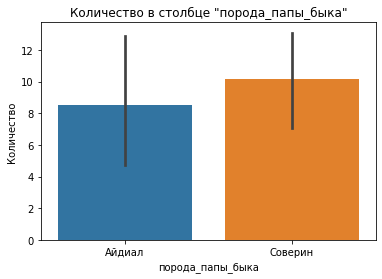

In [43]:
barplot_(df_buy, 'порода_папы_быка')

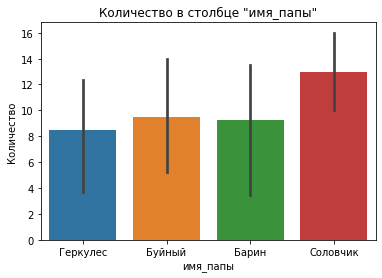

In [44]:
barplot_(df_buy, 'имя_папы')

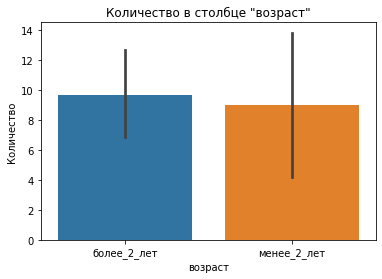

In [45]:
barplot_(df_buy, 'возраст')

**Промежуточный вывод:**<br>В тз было сказано провести статический анализ всех признаков. Нами было принято решение разделить все признаки на числовые и категориальные. Для анализа числовых признаков мы использовали ящики с усами, а для категориальных - столбчатые диаграммы.<br>Из всех графиков сделаем вывод по всем выбросам каждой таблицы.<br>Появились некоторые сомнения, что в столбце 'жирность' есть что-то похожее на выбросы. Однако такая картина вполне возможна, так как может и правда бОльшая часть молока имеет жирность 3.7%.<br>Поэтому мы отбросили сомнения и сделали вывод, что критичных выбросов (аномалий) не обнаружено, поэтому не стоит не от чего избавляться или как-то корректировать данные в таком случае.<br>Большая часть признаков имеет ненормальное распределение.<br>Стоит сказать, что данные готовы к дальнейшему исследованию.

## Корреляционный анализ.

#### Изучите взаимосвязь между признаками  в датасете 'df_main'. 

In [47]:
phik_matrix_all = phik_matrix(df_main)

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


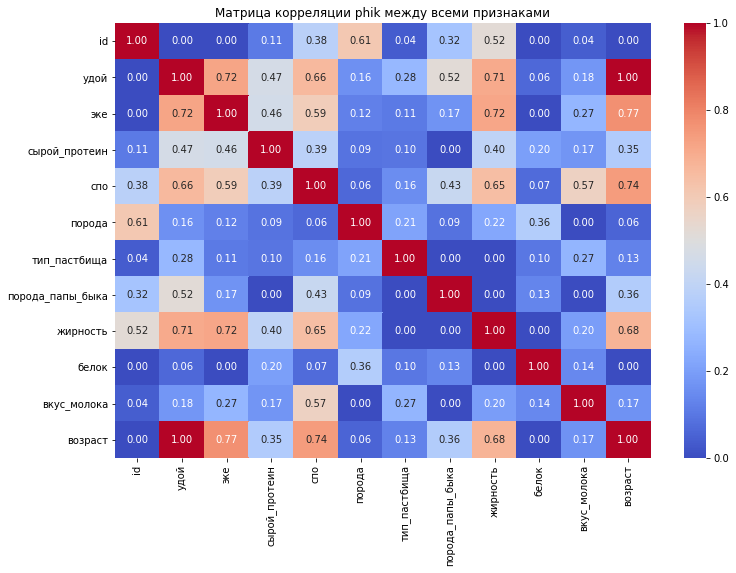

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции phik между всеми признаками')
plt.show()

In [49]:
num = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

In [50]:
def func(hue):    
    g = sns.pairplot(df_main, x_vars=num, y_vars=['удой'], hue=hue)
    g.fig.suptitle(f'Взаимосвязь удоя и количественных признаков с учетом фактора "{hue}"')
    plt.tight_layout()
    g.add_legend(title=hue)
    plt.show()

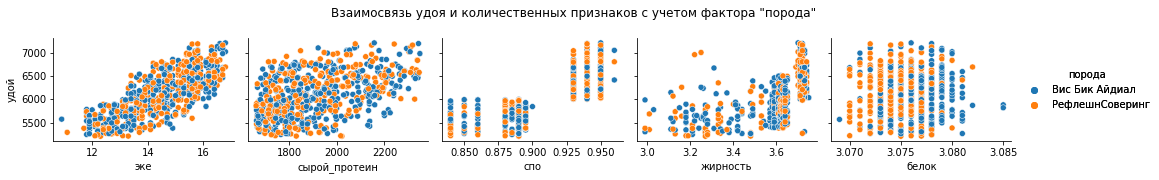

In [51]:
func('порода')

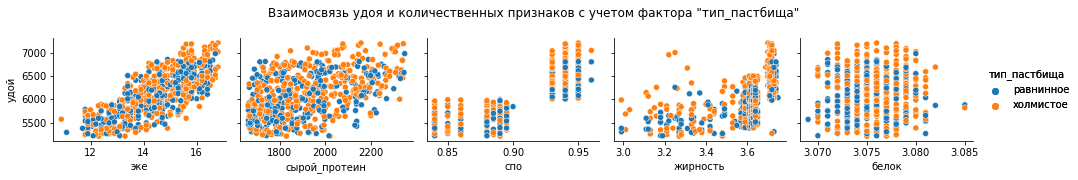

In [52]:
func('тип_пастбища')

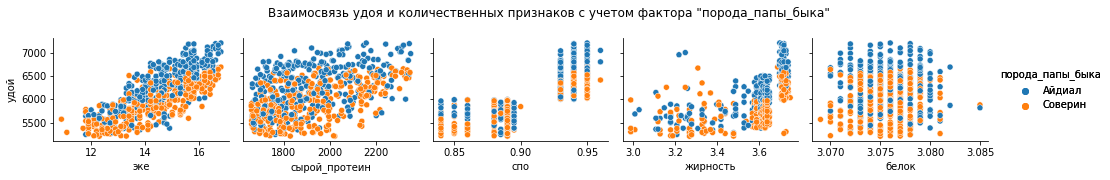

In [53]:
func('порода_папы_быка')

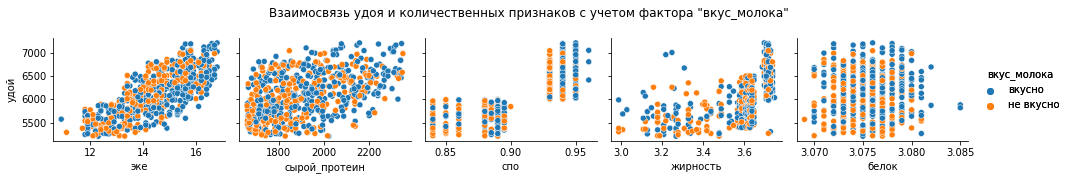

In [54]:
func('вкус_молока')

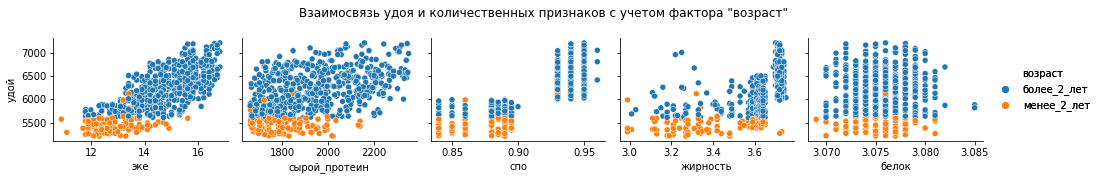

In [55]:
func('возраст')

**Промежуточный вывод:**<br>По коэффициентам корреляции можно сказать следующее:<br>Удой имеет сильную зависимость с эке и спо, среднюю с жирностью, слабую с сырым протеином а с белком зависомости вовсе не наблюдается.<br>По диаграмам сделаем следующие выводы:<br>- между удоем и эке с учетом любого категориального признака наблюдается нелинейная связь;<br>- между удоем и сырым протеином с учетом любого категориального признака наблюдается скорее нелинейная связь;<br>- между удоем и спо с учетом любого категориального признака наблюдается нелинейная связь;<br>- между удоем и жирностью с учетом любого категориального признака скорее наблюдается нелинейная связь;<br>- между удоем и белком с учетом любого категориального признака скорее связь отстутсвует;<br>Нелинейную связь между признаками можно утсранить с помощью добавления полиномиальных признаков более высоких степеней или применение различных преобразований к признакам, однако мы с этим пока что ничего не будем делать.<br>Мультиколлинеарность можно определить по матрице корреляции. Мультиколлениарность отсутствует.

## Обучение модели линейной регрессии.

#### Задача: обучить три модели простой линейной регрессии.

#### Первая модель

Для первой модели было принято решение убрать признаки 'жирность', 'белок' и 'вкус_молока', так как они не влияют на удой.

In [56]:
RANDOM_STATE = 42

In [57]:
y = df_main['удой']
X = df_main.drop(['удой', 'жирность', 'белок','вкус_молока'], axis = 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [59]:
cat = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num = ['эке', 'сырой_протеин', 'спо']

In [60]:
encoder = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

In [61]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num])
X_test_scaled = scaler.transform(X_test[num])

In [62]:
encoder_names = encoder.get_feature_names()

In [63]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [64]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

In [65]:
r2 = r2_score(y_test, predictions)  
print("R2 =", r2)

R2 = 0.7844078173416967


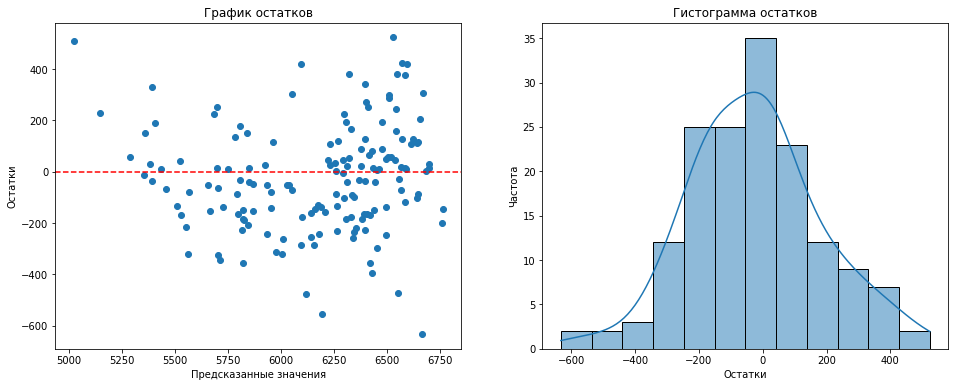

In [66]:
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].scatter(predictions, residuals)
axes[0].set_title('График остатков')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].axhline(y=0, color='r', linestyle='--')

sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Гистограмма остатков')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
None

**Промежуточный вывод:**<br>Значение r2 = 0.7844 (близкое к единице), а значит примерно 78.44% дисперсии зависимой переменной (целевой переменной) объясняется использованной регрессионной моделью.<br>По графику остатков можно сказать, что многие точки отдалено от линии.<br>По гистограмме остатков можно сказать, что выбросов мало, распределение похоже на нормальное.

#### Вторая модель

Избавляемся от нелинейности.

In [67]:
df_model2 = df_main.copy()

In [68]:
spo_threshold = 0.91
df_model2['спо_бин'] = (df_model2['спо'] > spo_threshold).astype(int)

df_model2['эке_кв'] = df_model2['эке']**2 

In [69]:
y_2 = df_model2['удой']
X_2 = df_model2.drop(['удой', 'жирность', 'белок','вкус_молока'], axis = 1)

In [70]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, random_state=RANDOM_STATE)

In [71]:
cat_2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_бин']
num_2 = ['эке_кв', 'сырой_протеин', 'эке']

In [72]:
encoder_2 = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_2])
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_2])

In [73]:
scaler_2 = StandardScaler()

X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_2])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_2])

In [74]:
encoder_names_2 = encoder_2.get_feature_names()

In [75]:
X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_2)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

In [76]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)

predictions_2 = model_lr_2.predict(X_test_2)

In [77]:
r2_2 = r2_score(y_test_2, predictions_2)  
print("R2 =", r2_2)

R2 = 0.8173201325732171


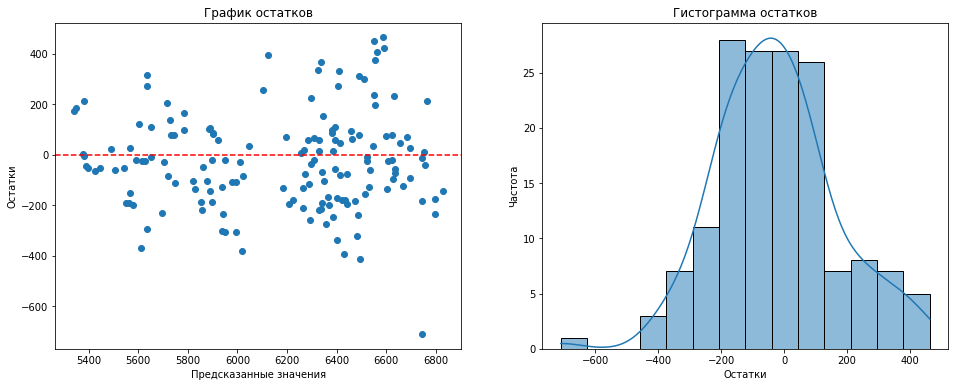

In [78]:
residuals_2 = y_test_2 - predictions_2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].scatter(predictions_2, residuals_2)
axes[0].set_title('График остатков')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].axhline(y=0, color='r', linestyle='--')

sns.histplot(residuals_2, kde=True, ax=axes[1])
axes[1].set_title('Гистограмма остатков')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
None

**Промежуточный вывод:**<br>Значение r2 = 0.8181 (близкое к единице), а значит примерно 81.81% дисперсии зависимой переменной (целевой переменной) объясняется использованной регрессионной моделью.<br>По графику остатков можно сказать, что многие точки стали ближе к линии, а значит модель стало работать точнее, а по гистограмме то, что выбросов практически нет.<br>На первый взгляд, вторая модель работает лучше.

#### Третья модель

Добавим в данные новый признак и обучим на них третью модель

In [79]:
df_model3 = df_main.copy()

In [80]:
spo_threshold = 0.91
df_model3['спо_бин'] = (df_model3['спо'] > spo_threshold).astype(int)

df_model3['эке_кв'] = df_model3['эке']**2 

In [81]:
dad_3 = df_dad.copy()

In [82]:
merge_model3 = pd.merge(df_model3, dad_3, how='left', on='id')

In [83]:
y_3 = merge_model3['удой']
X_3 = merge_model3.drop(['удой', 'жирность', 'белок','вкус_молока'], axis = 1) ##########

In [84]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y_3, random_state=RANDOM_STATE)

In [85]:
cat_3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_бин']
num_3 = ['эке_кв', 'сырой_протеин', 'эке']

In [86]:
encoder_3 = OneHotEncoder(drop = 'first', sparse = False)

X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_3])
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_3])

In [87]:
scaler_3 = StandardScaler()

X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_3])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_3])

In [88]:
encoder_names_3 = encoder_3.get_feature_names()

In [89]:
X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_3)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

In [90]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)

predictions_3 = model_lr_3.predict(X_test_3)

In [91]:
r2_3 = r2_score(y_test_3, predictions_3)  
print("R2 =", r2_3)

R2 = 0.8288305584835518


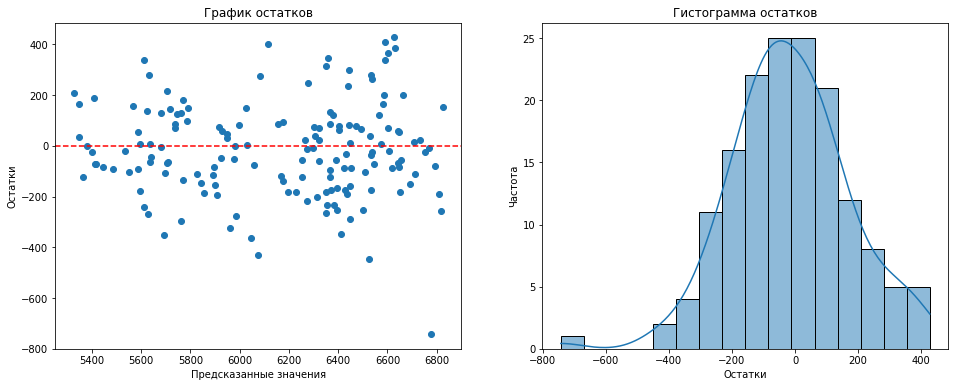

In [92]:
residuals_3 = y_test_3 - predictions_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].scatter(predictions_3, residuals_3)
axes[0].set_title('График остатков')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].axhline(y=0, color='r', linestyle='--')

sns.histplot(residuals_3, kde=True, ax=axes[1])
axes[1].set_title('Гистограмма остатков')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
None

**Промежуточный вывод:**<br>Значение r2 = 0.8248 (близкое к единице), а значит примерно 82.48% дисперсии зависимой переменной (целевой переменной) объясняется использованной регрессионной моделью.<br>По графику остатков можно сказать, что теперь точки располагаются еще ближе к линии, а по гистограмме - выбросов мало.

In [93]:
print('R2 первой модели:', r2)
print('R2 второй модели:', r2_2)
print('R2 третьей модели:', r2_3)

R2 первой модели: 0.7844078173416967
R2 второй модели: 0.8173201325732171
R2 третьей модели: 0.8288305584835518


**Промежуточный вывод:**<br>R2 третьей модели ближе всех к единице, а ее остатки, согласно графику, также имеют расположение лучше, чем в двух других.<br>Значит, третья модель справляется со своей работой лучше двух предыдущих.

In [94]:
def metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

In [95]:
metrics(y_test, predictions) #первая модель

Mean Squared Error (MSE): 43887.015009660514
Mean Absolute Error (MAE): 164.24194463474925
Root Mean Squared Error (RMSE): 209.4922791170608


In [96]:
metrics(y_test_2, predictions_2) #вторая модель

Mean Squared Error (MSE): 37187.22072789052
Mean Absolute Error (MAE): 150.771505043039
Root Mean Squared Error (RMSE): 192.83988365452444


In [97]:
metrics(y_test_3, predictions_3) #третья модель

Mean Squared Error (MSE): 34844.101286054894
Mean Absolute Error (MAE): 145.50602729083894
Root Mean Squared Error (RMSE): 186.66574749014586


**Промежуточный вывод:**<br>Третья модель имеет наименьшие значения MSE, MAE и RMSE. Таким образом, ее можно считать лучшей и по метрикам.

In [98]:
print(np.quantile(predictions_3, 0.025))
print(np.quantile(predictions_3, 0.975))

5378.889790366385
6779.537358495814


**Промежуточный вывод:**<br>Доверительный интервал для третьей модели (5382.95; 6768.59). Это значит, что в это интервале ожидается 95% удоя коров.

#### Cпрогнозируем удой коров, которых фермер хочет купить.

In [99]:
df_buy['эке'] = df_main['эке'].mean()*1.05
df_buy['сырой_протеин'] = df_main['сырой_протеин'].mean()*1.05
df_buy['спо'] =  df_main['спо'].mean()*1.05
df_buy['удой'] = df_main['удой']

spo_threshold = 0.91
df_buy['спо_бин'] = (df_buy['спо'] > spo_threshold).astype(int)

df_buy['эке_кв'] = df_buy['эке']**2 

In [100]:
X_buy = df_buy.drop(['удой', 'текущая_жирность', 'текущий_белок'], axis=1)
y_buy = df_buy['удой']

In [101]:
cat_buy = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_бин' ]
num_buy = ['эке_кв', 'сырой_протеин', 'эке']

In [102]:
X_test_ohe_buy = encoder_3.transform(X_buy[cat_buy])
X_test_scaled_buy = scaler_3.transform(X_buy[num_buy])

In [103]:
encoder_names_buy = encoder_3.get_feature_names()

In [104]:
X_test_ohe_buy = pd.DataFrame(X_test_ohe_buy, columns=encoder_names_buy)

X_test_scaled_buy = pd.DataFrame(X_test_scaled_buy, columns=num_buy)

X_test_buy = pd.concat([X_test_ohe_buy, X_test_scaled_buy], axis=1)

In [105]:
predictions_buy = model_lr_3.predict(X_test_buy)
df_buy['прогноз'] = predictions_buy

print(df_buy['прогноз'])

0     6581.069175
1     6308.701838
2     6263.024906
3     6571.763131
4     6525.082196
5     6341.470363
6     6581.069175
7     6541.434141
8     6263.024906
9     6339.030828
10    6324.465127
11    6574.202666
12    6581.069175
13    6065.242298
14    6263.024906
15    6571.763131
16    6324.465127
17    6341.470363
18    6541.434141
19    6525.082196
Name: прогноз, dtype: float64


In [106]:
print(df_main['удой'].describe())

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64


In [107]:
print(df_main.query('удой > 6000').count())

id                  370
удой                370
эке                 370
сырой_протеин       370
спо                 370
порода              370
тип_пастбища        370
порода_папы_быка    370
жирность            370
белок               370
вкус_молока         370
возраст             370
dtype: int64


**Промежуточный вывод:**<br>Все значения выше 6000. Среднее значение удоя которых, которые уже были приобретены фермером равно 6125.97, минимальное значение равно 5204, а максимальное - 7222. На данном этапе можно сделать вывод, что все коровы, которые рассматриваются к покупке - выгодны, и стоит серьзено задуматься об их покупке.

## Задача классификации.

In [108]:
df_main = merge_model3.copy()

df_main['вкус_молока'] = df_main['вкус_молока'].apply(lambda x:1 if x == 'вкусно' else 0)

bins = [-float('inf'), 3.45, 3.68, float('inf')]
labels = ['низкая', 'средняя', 'высокая']

df_main['жирность_кат'] = pd.cut(df_main['жирность'], bins=bins, labels=labels, right=False)

X_4 = df_main.drop(columns=['вкус_молока'])
y_4 = df_main['вкус_молока']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_4, 
    y_4, 
    random_state=RANDOM_STATE
)

In [109]:
cat_4 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_бин', 'жирность_кат']
num_4 = ['эке_кв', 'сырой_протеин', 'эке']

In [110]:
encoder_4 = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')

X_train_ohe_4 = encoder_4.fit_transform(X_train_4[cat_4])
X_test_ohe_4 = encoder_4.transform(X_test_4[cat_4])

In [111]:
scaler_4 = StandardScaler()

X_train_scaled_4 = scaler_4.fit_transform(X_train_4[num_4])
X_test_scaled_4 = scaler_4.transform(X_test_4[num_4])

In [112]:
encoder_names_4 = encoder_4.get_feature_names()

In [113]:
X_train_ohe_4 = pd.DataFrame(X_train_ohe_4, columns=encoder_names_4)
X_test_ohe_4 = pd.DataFrame(X_test_ohe_4, columns=encoder_names_4)

X_train_scaled_4 = pd.DataFrame(X_train_scaled_4, columns=num_4)
X_test_scaled_4 = pd.DataFrame(X_test_scaled_4, columns=num_4)

X_train_4 = pd.concat([X_train_ohe_4, X_train_scaled_4], axis=1)
X_test_4 = pd.concat([X_test_ohe_4, X_test_scaled_4], axis=1)

In [114]:
clf = LogisticRegression(random_state = RANDOM_STATE)
clf = clf.fit(X_train_4, y_train_4)
predictions_4 = clf.predict(X_test_4)

In [115]:
accuracy = accuracy_score(y_test_4, predictions_4)
recall = recall_score(y_test_4, predictions_4)
precision = precision_score(y_test_4, predictions_4)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.643312101910828
Recall: 0.8636363636363636
Precision: 0.6333333333333333


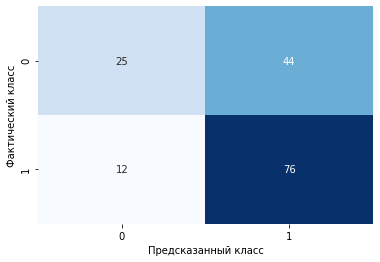

In [116]:
cm = confusion_matrix(y_test_4, predictions_4)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

**Промежуточный вывод:**<br>По матрице ошибок видно, что большая часть предсказанных значений совпали. Однако результат не является идеальным, и мы стремимся к улучшению модели. Recall и Precission - метрики, благодаря которым мы можем понимать, насколько можно доверять модели. Из-за чего, Precission для нас критична, так как мы не должны допустить покупки коровы, которую модель ошибочно рассмотрела как дающую вкусное молоко.

In [118]:
probabilities_one_valid = clf.predict_proba(X_test_4)[:,1]    

for i in np.arange(0.5, 0.9, 0.05):
    y_pred = probabilities_one_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test_4, y_pred))

порог:  0.5 precision:  0.6333333333333333
порог:  0.55 precision:  0.6634615384615384
порог:  0.6000000000000001 precision:  0.6888888888888889
порог:  0.6500000000000001 precision:  0.7536231884057971
порог:  0.7000000000000002 precision:  0.78
порог:  0.7500000000000002 precision:  0.9
порог:  0.8000000000000003 precision:  0.9090909090909091
порог:  0.8500000000000003 precision:  1.0


Accuracy: 0.46496815286624205
Recall: 0.045454545454545456
Precision: 1.0


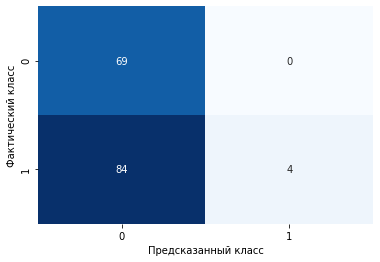

In [119]:
new_threshold = 0.85

predictions_with_new_threshold = (probabilities_one_valid > new_threshold).astype(int)

accuracy = accuracy_score(y_test_4, predictions_with_new_threshold)
recall = recall_score(y_test_4, predictions_with_new_threshold)
precision = precision_score(y_test_4, predictions_with_new_threshold)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

conf_matrix = confusion_matrix(y_test_4, predictions_with_new_threshold)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

**Промежуточный вывод:**<br>Мы свели precision к нулю. Далее нам можно приступить к прогнозу вкуса молока из файла, состоящего из коров, которых фермер хочет купить.

#### С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. 

In [120]:
df_buy['вкус_молока'] = df_main['вкус_молока']

df_buy['эке'] = df_main['эке'].mean()*1.05
df_buy['сырой_протеин'] = df_main['сырой_протеин'].mean()*1.05
df_buy['спо'] =  df_main['спо'].mean()*1.05
df_buy['удой'] = df_main['удой']
df_buy['жирность_кат'] = df_main['жирность_кат']

X_buy_ = df_buy.drop(['вкус_молока', 'текущая_жирность', 'текущий_белок'], axis=1)
y_buy_ = df_buy['вкус_молока']

In [121]:
cat_buy_ = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_бин', 'жирность_кат']
num_buy_ = ['эке_кв', 'сырой_протеин', 'эке']

In [122]:
X_test_ohe_buy_ = encoder_4.transform(X_buy_[cat_buy_])
X_test_scaled_buy_ = scaler_4.transform(X_buy_[num_buy_])

In [123]:
encoder_names_buy_ = encoder_4.get_feature_names()

In [124]:
X_test_ohe_buy_ = pd.DataFrame(X_test_ohe_buy_, columns=encoder_names_buy_)

X_test_scaled_buy_ = pd.DataFrame(X_test_scaled_buy_, columns=num_buy_)

X_test_buy_ = pd.concat([X_test_ohe_buy_, X_test_scaled_buy_], axis=1)

In [125]:
predictions_buy_ = clf.predict(X_test_buy_)
df_buy['прогноз_вкуса_молока'] = predictions_buy_

print(df_buy['прогноз_вкуса_молока'])

0     1
1     0
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    1
Name: прогноз_вкуса_молока, dtype: int64


**Промежуточный вывод:**<br>Согласно полученному прогнозу, невкусное молоко будет у коров с id: 1, 2, 5 и 17.

# Итоговые выводы.

Нами была проделана большая работа, и стоит сказать, что коровы из файла cow_buy.csv рекомендованы к их покупке, кроме коров с id: 1, 2, 5 и 17, ведь их молоко, согласно прогнозу будет невкусным. Всех остальных коров можно не задумываясь покупать, ведь их удой более 6000 и молоко вкусное.<br>В завершении данного проекта сделаем выводы по использованный моделям.<br>**Модель линейной регрессии** предназначена для задач регрессии, то есть для прогнозирования числовых значений. В вашем случае использовалась для предсказания удоя коров. Для улучшения ее качества можно рассмотреть возможности добавления новых признаков, использование полиномиальных признаков, подбор оптимальных параметров модели, проверка на наличие выбросов и аномалий в данных. Важными моментами являются значения метрик качества, таких как MSE, MAE, RMSE, которые оценивают точность предсказаний. Если они низкие, то модель достаточно хорошо описывает зависимость целевого значения от признаков.<br>**Модель логистической регрессии**Используется в задачах бинарной классификации, например, предсказания того, вырастет или упадет цена. Чтобв улучшить ее качество, можно экспериментировать с добавлением новых признаков, использовать методы отбора признаков, изменять порог принятия решения для настройки баланса между точностью и полнотой. Метрики, такие как accuracy, recall, precision, играют важную роль в оценке эффективности классификации.<br>Возможность дополнительного улучшения результатов регрессионной модели присутствует. Например, обработка и использование данных о коровах более тщательным образом, включая более сложные методы предобработки, учет временных аспектов или введение дополнительных признаков, таких как погодные условия, рацион кормления и другие внешние факторы.